# 00. About this Python script
This Python script models and forecasts the monetary aggregate M3 time series data for Europe, the USA, and Japan. Key functions include:

1. **Data Collection**: Importing historical M3 data from the FRED website (https://fred.stlouisfed.org/).
2. **Stationarity Testing**: Applying the ADF test to check for stationarity.
3. **ACF/PACF Analysis**: Visualizing autocorrelation and partial autocorrelation to guide model selection.
4. **ARIMA Modeling**: Fitting ARIMA models and choosing the best one based on AIC.
5. **Forecasting**: Forecasting future M3 values up to 2027 (forecasting from 2023 until 2027).
6. **Visualization**: Visualizing the results of the analysis.

**Note**: *This forecast was developed as part of a master's thesis to enhance skills in Python and time series analysis. These forecasts are not official projections and are part of a personal research project.*

## **00.01. Setting the stage - Library Imports**
This section imports all the necessary libraries used throughout the Python script. Each library serves a specific purpose in the process of time series analysis and modeling, as explained by the comments next to each import.

In [ ]:
# General library import
import pandas as pd
import matplotlib.pyplot as plt
# Specific library import - for time series analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Autocorrelation and partial autocorrelation functions
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test for testing stationarity in time series
from statsmodels.stats.diagnostic import het_arch # ARCH test
from statsmodels.tsa.arima.model import ARIMA # ARIMA model

## **00.02. Data Loading - Google Drive**

Since this Python script was written in the Google Colab environment, I loaded the data through Google Drive.
As loading the data is based on file paths, please update the paths if needed to match your Google Drive structure.

**Note:** *For faster use, I've also manually added the raw data into the dataframes in the code block below - **00.03. Data Loading - Manual Data Definition**.*

In [ ]:
# Step 1: Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the file paths (update these paths to your specific Google Drive directory)
europe_path = '/content/drive/MyDrive/master/data/europe.csv'
usa_path = '/content/drive/MyDrive/master/data/usa.csv'
japan_path = '/content/drive/MyDrive/master/data/japan.csv'

# Step 3: Load the data into the pandas DataFrames
df_europe = pd.read_csv(europe_path)
df_usa = pd.read_csv(usa_path)
df_japan = pd.read_csv(japan_path)

# Step 4: Rename columns, convert 'date' to datetime, and set as index
df_europe.rename(columns={"DATE": "date", "MABMM301EZA189N": "M3"}, inplace=True)
df_usa.rename(columns={"DATE": "date", "MABMM301USA189S": "M3"}, inplace=True)
df_japan.rename(columns={"DATE": "date", "MABMM301JPA189N": "M3"}, inplace=True)

df_europe['date'] = pd.to_datetime(df_europe['date'])
df_usa['date'] = pd.to_datetime(df_usa['date'])
df_japan['date'] = pd.to_datetime(df_japan['date'])

df_europe.set_index('date', inplace=True)
df_usa.set_index('date', inplace=True)
df_japan.set_index('date', inplace=True)

# Step 5: Check the processed data
print("Europe Data:")
print(df_europe.head())
print("\nUSA Data:")
print(df_usa.head())
print("\nJapan Data:")
print(df_japan.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Europe Data:
                      M3
date                    
1970-01-01  3.533000e+11
1971-01-01  4.058000e+11
1972-01-01  4.723000e+11
1973-01-01  5.362000e+11
1974-01-01  6.021000e+11

USA Data:
                      M3
date                    
1960-01-01  3.043083e+11
1961-01-01  3.248167e+11
1962-01-01  3.500750e+11
1963-01-01  3.795750e+11
1964-01-01  4.093500e+11

Japan Data:
                      M3
date                    
1980-01-01  3.209507e+14
1981-01-01  3.546403e+14
1982-01-01  3.825562e+14
1983-01-01  4.114407e+14
1984-01-01  4.433724e+14


## **00.03. Data Loading - Manual Data Definition**

For convenience and faster execution, the raw data for Europe, Japan, and the USA has been manually defined directly in the script.
Below, we convert this raw data into pandas DataFrames, perform necessary preprocessing steps such as renaming columns,
converting date columns to datetime format, and setting the date as the index.

In [ ]:
# Raw data for Europe, Japan, and USA
raw_europe = {
    "Date": [
        "1970-01-01", "1971-01-01", "1972-01-01", "1973-01-01", "1974-01-01",
        "1975-01-01", "1976-01-01", "1977-01-01", "1978-01-01", "1979-01-01",
        "1980-01-01", "1981-01-01", "1982-01-01", "1983-01-01", "1984-01-01",
        "1985-01-01", "1986-01-01", "1987-01-01", "1988-01-01", "1989-01-01",
        "1990-01-01", "1991-01-01", "1992-01-01", "1993-01-01", "1994-01-01",
        "1995-01-01", "1996-01-01", "1997-01-01", "1998-01-01", "1999-01-01",
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01",
        "2005-01-01", "2006-01-01", "2007-01-01", "2008-01-01", "2009-01-01",
        "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01",
        "2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01",
        "2020-01-01", "2021-01-01", "2022-01-01"
    ],
    "M3": [
        3.533e+11, 4.058e+11, 4.723e+11, 5.362e+11, 6.021e+11,
        6.895e+11, 7.825e+11, 8.892e+11, 1.0142e+12, 1.1291e+12,
        1.198927e+12, 1.324037e+12, 1.478452e+12, 1.607971e+12, 1.742791e+12,
        1.882118e+12, 2.011545e+12, 2.173838e+12, 2.358041e+12, 2.593728e+12,
        2.907362e+12, 3.132988e+12, 3.365086e+12, 3.588556e+12, 3.672401e+12,
        3.87711e+12, 4.037575e+12, 4.222019e+12, 4.422982e+12, 4.667221e+12,
        4.859203e+12, 5.402883e+12, 5.767431e+12, 6.148767e+12, 6.54037e+12,
        7.087688e+12, 7.753664e+12, 8.647955e+12, 9.402536e+12, 9.349659e+12,
        9.298961e+12, 9.497899e+12, 9.786331e+12, 9.832592e+12, 1.0326079e+13,
        1.0842914e+13, 1.1382088e+13, 1.1860289e+13, 1.23714e+13, 1.2987389e+13,
        1.4483234e+13, 1.5507427e+13, 1.6068662e+13
    ]
}

raw_usa = {
    "Date": [
        "1960-01-01", "1961-01-01", "1962-01-01", "1963-01-01", "1964-01-01",
        "1965-01-01", "1966-01-01", "1967-01-01", "1968-01-01", "1969-01-01",
        "1970-01-01", "1971-01-01", "1972-01-01", "1973-01-01", "1974-01-01",
        "1975-01-01", "1976-01-01", "1977-01-01", "1978-01-01", "1979-01-01",
        "1980-01-01", "1981-01-01", "1982-01-01", "1983-01-01", "1984-01-01",
        "1985-01-01", "1986-01-01", "1987-01-01", "1988-01-01", "1989-01-01",
        "1990-01-01", "1991-01-01", "1992-01-01", "1993-01-01", "1994-01-01",
        "1995-01-01", "1996-01-01", "1997-01-01", "1998-01-01", "1999-01-01",
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01",
        "2005-01-01", "2006-01-01", "2007-01-01", "2008-01-01", "2009-01-01",
        "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01",
        "2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01",
        "2020-01-01", "2021-01-01", "2022-01-01"
    ],
    "M3": [
        3.04308e+11, 3.24817e+11, 3.50075e+11, 3.79575e+11, 4.0935e+11,
        4.42508e+11, 4.71358e+11, 5.03592e+11, 545308333333.33307, 5.78658e+11,
        6.014e+11, 6.74392e+11, 7.58133e+11, 8.318e+11, 880666666666.6659,
        963666666666.6659, 1086591666666.6702, 1.22138e+12, 1322408333333.3298, 1425766666666.6702,
        1.54035e+12, 1679591666666.6702, 1.83123e+12, 2054458333333.3298, 2.21897e+12,
        2.41628e+12, 2.61267e+12, 2.78215e+12, 2.93103e+12, 3.05385e+12,
        3.22226e+12, 3.34227e+12, 3.40483e+12, 3.43993e+12, 3.48331e+12,
        3.55538e+12, 3.72834e+12, 3.92531e+12, 4206024999999.9995, 4517133333333.329,
        4.79053e+12, 5.20445e+12, 5.59211e+12, 5.9817e+12, 6.2664e+12,
        6.53397e+12, 6.87598e+12, 7.2967e+12, 7.7904e+12, 8416216666666.671,
        8626616666666.671, 9.25616e+12, 1.00504e+13, 10727666666666.701, 1.13896e+13,
        1.20463e+13, 1.28617e+13, 1.35916e+13, 1.41039e+13, 1.48177e+13,
        1.76496e+13, 2.05096e+13, 2.15729e+13
    ]
}

raw_japan = {
    "Date": [
        "1980-01-01", "1981-01-01", "1982-01-01", "1983-01-01", "1984-01-01",
        "1985-01-01", "1986-01-01", "1987-01-01", "1988-01-01", "1989-01-01",
        "1990-01-01", "1991-01-01", "1992-01-01", "1993-01-01", "1994-01-01",
        "1995-01-01", "1996-01-01", "1997-01-01", "1998-01-01", "1999-01-01",
        "2000-01-01", "2001-01-01", "2002-01-01", "2003-01-01", "2004-01-01",
        "2005-01-01", "2006-01-01", "2007-01-01", "2008-01-01", "2009-01-01",
        "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01",
        "2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01",
        "2020-01-01", "2021-01-01", "2022-01-01"
    ],
    "M3": [
        3.20951e+14, 3.5464e+14, 3.82556e+14, 4.11441e+14, 4.43372e+14,
        4.8439574859999994e+14, 5.2387932640000006e+14, 5.83878e+14, 6.44687e+14, 7.13139e+14,
        7.73899e+14, 7.89303e+14, 7.85854e+14, 7.96522e+14, 8.19663e+14,
        8.4568271079999999e+14, 8.70182e+14, 9.03065e+14, 9.4246962789999999e+14, 9.67371e+14,
        9.77762e+14, 9.96465e+14, 1.009151e+15, 1.01887e+15, 1.028684e+15,
        1.032146e+15, 1.02627e+15, 1.0331481e+15, 1.0406445e+15, 1.0635184e+15,
        1.0829365e+15, 1.1114608e+15, 1.1358541e+15, 1.1745546e+15, 1.2085312e+15,
        1.2386e+15, 1.2800804e+15, 1.3192095e+15, 1.3469683e+15, 1.3762321e+15,
        1.4813455e+15, 1.5309517e+15, 1.5693481e+15
    ]
}

# Converting raw data into pandas DataFrames
df_europe_raw = pd.DataFrame(raw_europe)
df_usa_raw = pd.DataFrame(raw_usa)
df_japan_raw = pd.DataFrame(raw_japan)

# Renaming columns
df_europe_raw.rename(columns={"Date": "date", "M3": "M3"}, inplace=True)
df_usa_raw.rename(columns={"Date": "date", "M3": "M3"}, inplace=True)
df_japan_raw.rename(columns={"Date": "date", "M3": "M3"}, inplace=True)

# Converting date to datetime
df_europe_raw['date'] = pd.to_datetime(df_europe_raw['date'])
df_usa_raw['date'] = pd.to_datetime(df_usa_raw['date'])
df_japan_raw['date'] = pd.to_datetime(df_japan_raw['date'])

# Setting the date as index
df_europe_raw.set_index('date', inplace=True)
df_usa_raw.set_index('date', inplace=True)
df_japan_raw.set_index('date', inplace=True)

# Setting the frequency
df_europe = df_europe_raw.asfreq('AS-JAN')
df_usa = df_usa_raw.asfreq('AS-JAN')
df_japan = df_japan_raw.asfreq('AS-JAN')

# Reviewing loaded data
print("Europe Raw Data:")
print(df_europe_raw.head())
print("\nUSA Raw Data:")
print(df_usa_raw.head())
print("\nJapan Raw Data:")
print(df_japan_raw.head())

Europe Raw Data:
                      M3
date                    
1970-01-01  3.533000e+11
1971-01-01  4.058000e+11
1972-01-01  4.723000e+11
1973-01-01  5.362000e+11
1974-01-01  6.021000e+11

USA Raw Data:
                      M3
date                    
1960-01-01  3.043080e+11
1961-01-01  3.248170e+11
1962-01-01  3.500750e+11
1963-01-01  3.795750e+11
1964-01-01  4.093500e+11

Japan Raw Data:
                      M3
date                    
1980-01-01  3.209510e+14
1981-01-01  3.546400e+14
1982-01-01  3.825560e+14
1983-01-01  4.114410e+14
1984-01-01  4.433720e+14


# **01. Europe M3 Time Series Analysis**

In this chapter, we will perform an analysis of the M3 monetary aggregate data for Europe. The analysis will be broken down into several steps:

1. **Graphical Interpretation of the Time Series**:
   - The first step involves visualizing the time series data to assess its overall trend and behavior. The aim is to gain insights into the historical values and to verify whether the time series exhibits any trends.

2. **Stationarity Testing with ACF, PACF, and ADF**:
   - Following the initial graphical interpretation, we will confirm our hypothesis that the time series is non-stationary by generating correlograms (ACF and PACF plots). These plots will help identify patterns of autocorrelation in the time series and provide insights into the need for differencing to achieve stationarity.
   - Additionally, we will apply the Augmented Dickey-Fuller (ADF) test to formally test for the presence of a unit root in the series.

3. **First Differencing and Stationarity Testing**:
   - Based on the results of the ACF/PACF analysis and the ADF test, we will proceed with first differencing of the time series to eliminate any trends and achieve stationarity.
   - We will then repeat the ACF/PACF analysis and the ADF test on the differenced series. If the series remains non-stationary, we will continue differencing until stationarity is achieved.

4. **Model Selection and Fitting (ARIMA Model)**:
   - After achieving stationarity, we will define an ARIMA (p, d, q) model. The parameter d will be determined by the number of differencing steps required, while the parameters p and q will be selected based on the Partial Autocorrelation Function (PACF) for the autoregressive component (AR) and the Autocorrelation Function (ACF) for the moving average component (MA), respectively.
   - The Akaike Information Criterion (AIC) will be used to select the optimal model, with the lowest AIC value indicating the best fit.

5. **Model Validation**:
   - After selecting the best ARIMA model, we will validate its performance by plotting the actual vs. predicted values, and the residuals. The goal is to assess how well the model predicts the values, particularly during periods of economic shocks, such as the 2008 financial crisis and the 2020 COVID-19 pandemic.

6. **Residual Diagnostics**:
   - We will perform residual diagnostics to check for autocorrelation and heteroskedasticity. This will involve creating a correlogram for the selected model and applying the ARCH test for heteroskedasticity.
   - If no significant autocorrelation or heteroskedasticity is found, we can  use the model for forecasting.

7. **Forecasting Future Values**:
   - Finally, we will use the validated ARIMA model to forecast the M3 monetary aggregate for Europe from 2023 to 2027. The forecasted values will be visualized alongside historical data to illustrate the expected trend over the next five years.

## **01.01. Exploratory Data Visualization of Monetary Aggregate M3 for Europe**


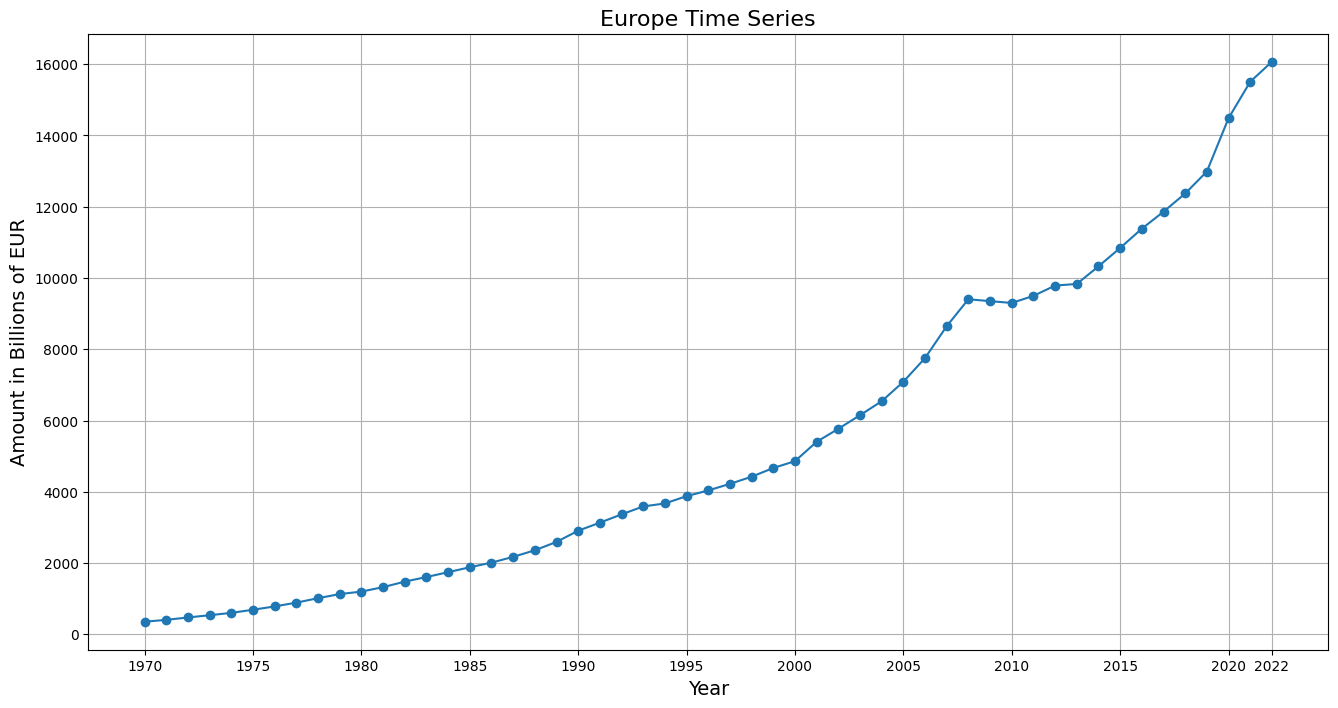

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df_europe.M3 / 1e9, marker='o')
plt.title('Europe Time Series', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Amount in Billions of EUR', size=14)
ticks = list(df_europe.index[::5]) + [df_europe.index[-1]]
plt.xticks(ticks=ticks, labels=[tick.year for tick in ticks])
plt.grid(True)
plt.show()


**Conclusion**: Based on the time series plot, it's clear that the M3 series for Europe is not stationary due to the upward trend. A stationary series would have a constant mean and variance over time, which is not observed here.

## **01.02 Stationarity Testing using ACF, PACF, and ADF Tests**
To further analyze the series, we will plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).

- **Autocorrelation Function (ACF)**: The ACF plot will help us understand how the current values of the series are correlated with its past values at different lags. If the series is non-stationary, we typically expect the ACF to decay slowly, indicating strong correlations over time.

- **Partial Autocorrelation Function (PACF)**: The PACF plot will allow us to examine the direct relationships between the current values of the series and its past values. The PACF plot will help us determine the order of the autoregressive (AR) term in an ARIMA model.

- **Augmented Dickey-Fuller (ADF) Test**: The ADF test is used to statistically determine if the time series is stationary by testing for the presence of a unit root.

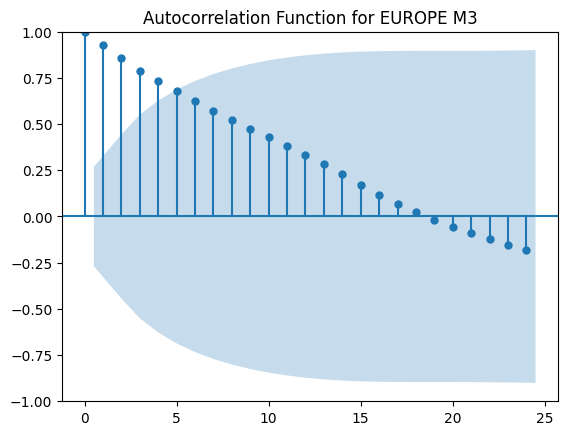

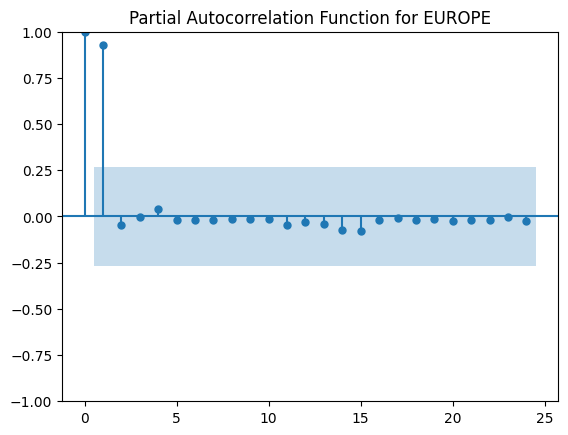

ADF Statistic: 4.989822
p-value: 1.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
The time series is not stationary.


In [ ]:
# Plotting the Autocorrelation (ACF)
plot_acf(df_europe.M3, lags=24, title='Autocorrelation Function for EUROPE M3')
plt.show()

# Plotting the Partial Autocorrelation (PACF)
plot_pacf(df_europe.M3, lags=24, title='Partial Autocorrelation Function for EUROPE')
plt.show()

# Augmented Dickey-Fuller Test (ADF)
adf_test = adfuller(df_europe.M3)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

## **01.03. Time Series Differencing**

**First difference:** In this section, we will address the issue of non-stationarity in the M3 time series for Europe by applying the first differencial. First differencing involves subtracting each value in the series from its preceding value, effectively removing any underlying trend and stabilizing the mean of the series over time. The primary goal of this transformation is to convert the non-stationary M3 series into a stationary one.

**Checking for stationarity (again):** After performing the first differencing, we will proceed by re-evaluating the stationarity of the transformed series. This will involve re-running the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to examine the new patterns of autocorrelation in the differenced data. Additionally, the Augmented Dickey-Fuller (ADF) test will be conducted again to statistically confirm whether the differenced series is now stationary.


In [ ]:
df_europe['first_difference'] = df_europe.M3.diff()
df_europe_first_diff = df_europe.dropna() #removing the first row since it has 'na' value
df_europe_first_diff.head()

,M3,first_difference
date,,
1971-01-01,4.058000e+11,5.250000e+10
1972-01-01,4.723000e+11,6.650000e+10
1973-01-01,5.362000e+11,6.390000e+10
1974-01-01,6.021000e+11,6.590000e+10
1975-01-01,6.895000e+11,8.740000e+10


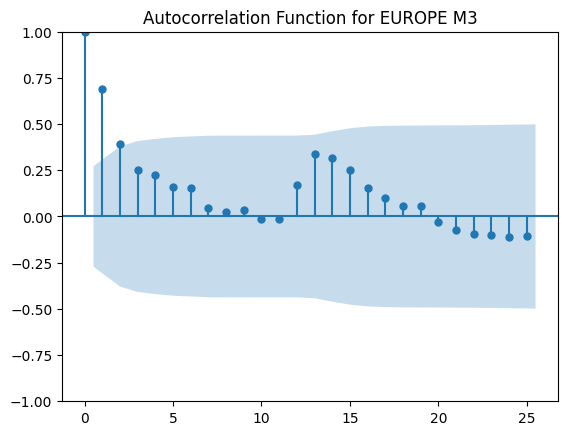

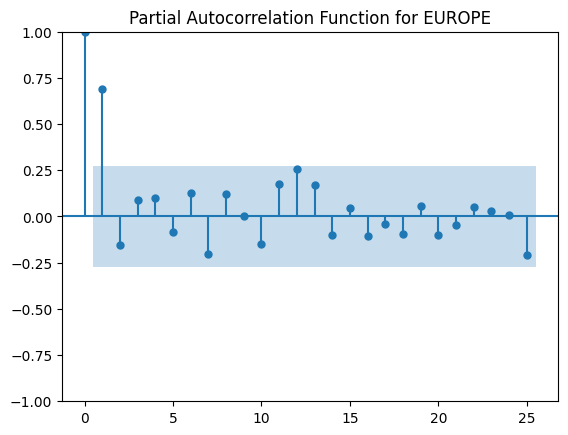

ADF Statistic: -4.575253
p-value: 0.001134
Critical Values:
	1%: -4.198
	5%: -3.524
	10%: -3.193
The time series is stationary.


In [ ]:
# Plotting the Autocorrelation (ACF)
plot_acf(df_europe_first_diff.first_difference, lags=25, title='Autocorrelation Function for EUROPE M3')
plt.show()

# Plotting the Partial Autocorrelation (PACF)
plot_pacf(df_europe_first_diff.first_difference, lags=25, title='Partial Autocorrelation Function for EUROPE')
plt.show()

# Augmented Dickey-Fuller Test (ADF)
adf_test = adfuller(df_europe_first_diff.first_difference, regression = 'ct')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

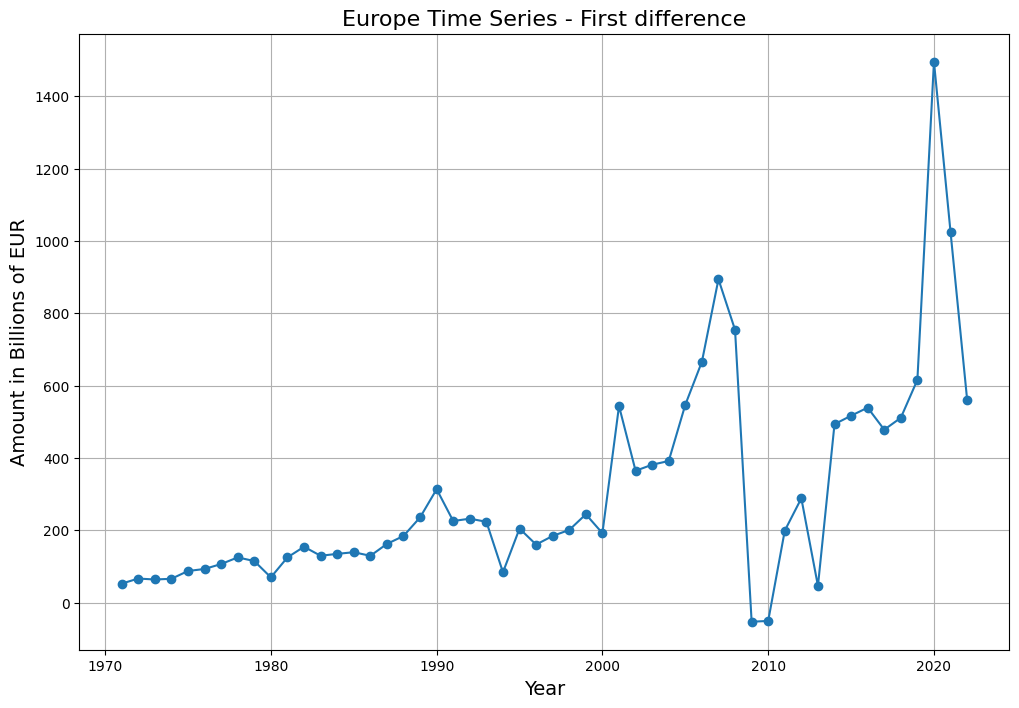

In [ ]:
# Plotting the first difference of the M3 time series for Europe
plt.figure(figsize=(12, 8))
plt.plot(df_europe_first_diff.first_difference / 1e9, marker = 'o')
plt.title('Europe Time Series - First difference', size = 16)
plt.xlabel('Year', size = 14)
plt.ylabel('Amount in Billions of EUR', size = 14)
plt.grid(True)
plt.show()

## **01.04. Defining the ARIMA Model**

With the successful elimination of the unit root and trend from the M3 monetary aggregate time series for Europe, resulting in a stationary series, the next step is to define the appropriate ARIMA (p, d, q) model. Based on the previous tests, the differencing parameter \(d\) is set to 1, as the series was differenced once to achieve stationarity. We now need to determine the values of \(p\) (the autoregressive component) and \(q\) (the moving average component). Now, based on the ACF and PACF we can infer the orders of MA and AR part of the ARIMA model respectively.

Having this in mind, we will evaluate three potential ARIMA models: ARIMA (0, 1, 2), ARIMA (1, 1, 0), and ARIMA (1, 1, 1). The most suitable model will be selected based on the Akaike Information Criterion (AIC), with the optimal model being the one with the lowest AIC value. This criterion helps ensure that we choose the model that best balances goodness of fit with model complexity.

**Note**: Since the sample size is the same for all models, we will primarily focus on the AIC criterion. While the Bayesian Information Criterion (BIC) accounts for sample size, in this case, it will not affect the comparison between models because the sample size is identical across models, so BIC would yield the same ranking as AIC.

In [ ]:
# Fit ARIMA(0, 1, 2) model
model_012 = ARIMA(df_europe['first_difference'].dropna(), order=(0, 1, 2), freq = 'AS-JAN')
model_fit_012 = model_012.fit()

# Summary of ARIMA(0, 1, 2)
model_summary_012 = model_fit_012.summary()
print(model_summary_012)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   52
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1401.046
Date:                Sat, 07 Sep 2024   AIC                           2808.093
Time:                        12:30:09   BIC                           2813.888
Sample:                    01-01-1971   HQIC                          2810.307
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2859      0.196     -1.460      0.144      -0.670       0.098
ma.L2         -0.3717      0.157     -2.367      0.018      -0.679      -0.064
sigma2      4.968e+22        nan        nan        n

In [ ]:
# Fit ARIMA(1, 1, 0) model
model_110 = ARIMA(df_europe['first_difference'].dropna(), order=(1, 1, 0), freq = 'AS-JAN')
model_fit_110 = model_110.fit()

# Summary of ARIMA(1, 1, 0)
model_summary_110 = model_fit_110.summary()
print(model_summary_110)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   52
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1404.942
Date:                Sat, 07 Sep 2024   AIC                           2813.884
Time:                        12:30:10   BIC                           2817.747
Sample:                    01-01-1971   HQIC                          2815.360
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0788      0.107     -0.737      0.461      -0.289       0.131
sigma2      5.056e+22   6.17e-25   8.19e+46      0.000    5.06e+22    5.06e+22
Ljung-Box (L1) (Q):                   0.05   Jarque-

In [ ]:
# Fit ARIMA(1, 1, 1) model
model_111 = ARIMA(df_europe['first_difference'].dropna(), order=(1, 1, 1), freq='AS-JAN')
model_fit_111 = model_111.fit()

# Summary of ARIMA(1, 1, 1)
model_summary_111 = model_fit_111.summary()
print(model_summary_111)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1401.550
Date:                Sat, 07 Sep 2024   AIC                           2809.100
Time:                        12:30:10   BIC                           2814.895
Sample:                    01-01-1971   HQIC                          2811.314
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5448      0.339      1.606      0.108      -0.120       1.210
ma.L1         -0.8812      0.165     -5.336      0.000      -1.205      -0.558
sigma2      4.867e+22        nan        nan        n

## **01.05. Evaluating our model - ARIMA (1,1,0)**

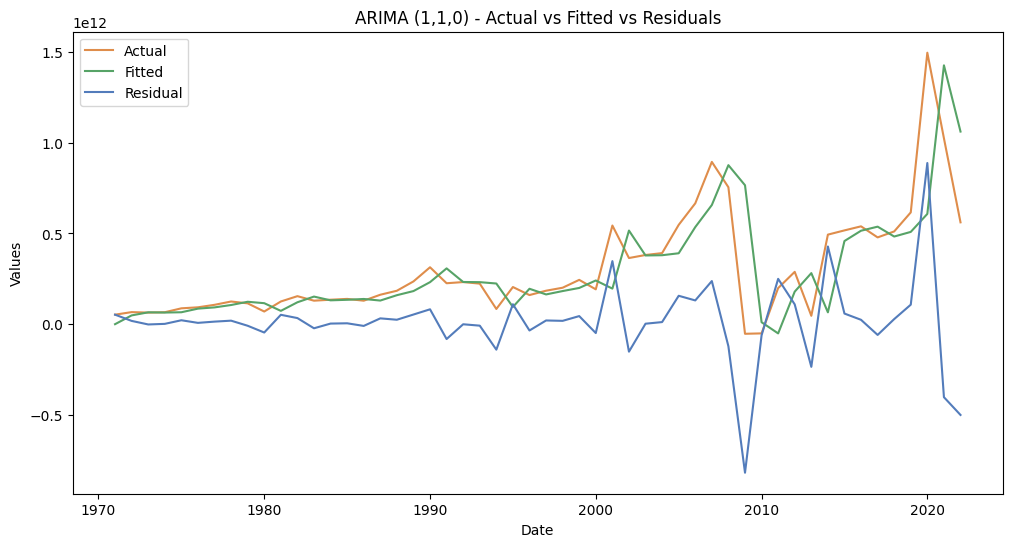

In [ ]:
## Forecast with ARIMA(1, 1, 0) model since it had the lowest AIC value
model_110 = ARIMA(df_europe['first_difference'].dropna(), order=(1, 1, 0), freq='as-jan')
model_fit_110 = model_110.fit()

df_europe['predicted'] = model_fit_110.predict()
df_europe['residual'] = df_europe['first_difference'] - df_europe['predicted']

plt.figure(figsize=(12, 6))
plt.plot(df_europe.index, df_europe['first_difference'], label='Actual', color='#df8d4b')
plt.plot(df_europe.index, df_europe['predicted'], label='Fitted', color='#57a367')
plt.plot(df_europe.index, df_europe['residual'], label='Residual', color='#537cbb')

plt.title('ARIMA (1,1,0) - Actual vs Fitted vs Residuals')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

## **01.06. ARCH test**

**About:** Through the ARCH test, we are examining whether the model exhibits heteroskedasticity, or time-varying volatility, that could impact the accuracy of our model's predictions. Detecting heteroskedasticity suggests that the residuals are not constant over time.

**Conclusion:** In our analysis, the most significant volatility occurs during economic crises, particularly in 2008 and 2020. However, the test results, with a p-value of 0.99, suggest that volatility does not significantly impact the model's performance in this case.

In [ ]:
arch_test = het_arch(df_europe['residual'].dropna())

print('ARCH Test Statistic:', arch_test[0])
print('ARCH Test p-value:', arch_test[1])

ARCH Test Statistic: 1.0784603365993206
ARCH Test p-value: 0.9997568765918404


## **01.07. Forecast and final results**

               Predicted      Lower CI      Upper CI
2023-01-01  1.655247e+13  1.612728e+13  1.697766e+13
2024-01-01  1.696954e+13  1.607087e+13  1.786820e+13
2025-01-01  1.732907e+13  1.590269e+13  1.875544e+13
2026-01-01  1.763900e+13  1.565427e+13  1.962372e+13
2027-01-01  1.790617e+13  1.534748e+13  2.046486e+13


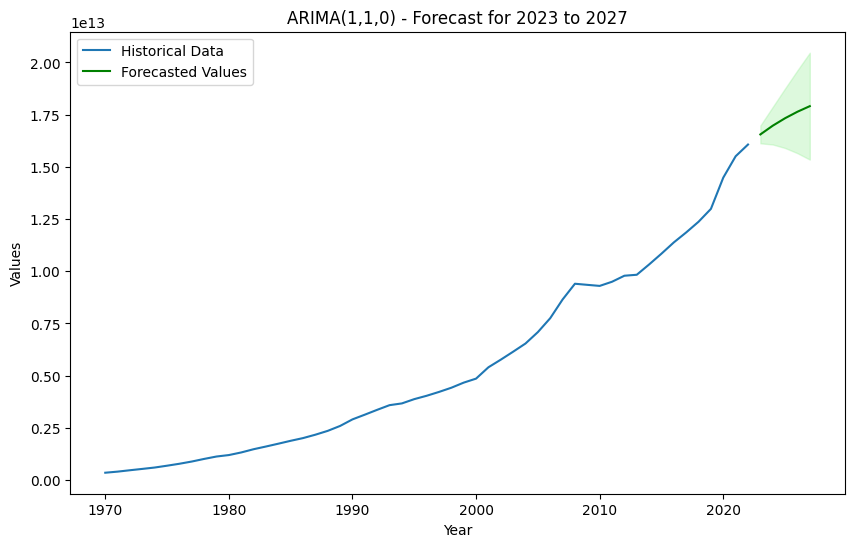

In [ ]:
# Fit ARIMA(1, 1, 0) model
model_110 = ARIMA(df_europe['M3'], order=(1, 1, 0), freq='as-jan')
model_fit_110 = model_110.fit()

# Forecast the next 5 years
forecast_years = 5
forecast = model_fit_110.get_forecast(steps=forecast_years)

predicted_values = forecast.predicted_mean.tolist()
confidence_intervals = forecast.conf_int()

lower_ci = confidence_intervals.iloc[:, 0].tolist()
upper_ci = confidence_intervals.iloc[:, 1].tolist()

future_dates = pd.date_range(start='2023-01-01', periods=forecast_years, freq='AS-JAN')

forecast_df = pd.DataFrame({
    'Predicted': predicted_values,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci
}, index=future_dates)

print(forecast_df)

plt.figure(figsize=(10, 6))
plt.plot(df_europe.index, df_europe['M3'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Predicted'], label='Forecasted Values', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='lightgreen', alpha=0.3)

plt.title('ARIMA(1,1,0) - Forecast for 2023 to 2027')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()

**Conclusion:** Based on the graph, which displays both historical and forecasted values of the M3 monetary aggregate for Europe, we can observe a continued upward trend in the M3 over the forecasted period. However, there is a slight stagnation in the growth, likely due to recent economic shocks, such as the Covid-19 pandemic. These shocks have affected volatility in the more recent periods, and while growth is expected to continue, it is anticipated to be more gradual, with greater uncertainty. This uncertainty is reflected in the widening confidence intervals shown in the green portion of the graph.

# **02. USA M3 Time Series Analysis**

In this chapter, we will perform an analysis of the M3 monetary aggregate data for the USA. We will follow the same steps as described in Europe M3 analysis.

## **02.01. Exploratory Data Visualization of Monetary Aggregate M3 for the USA**


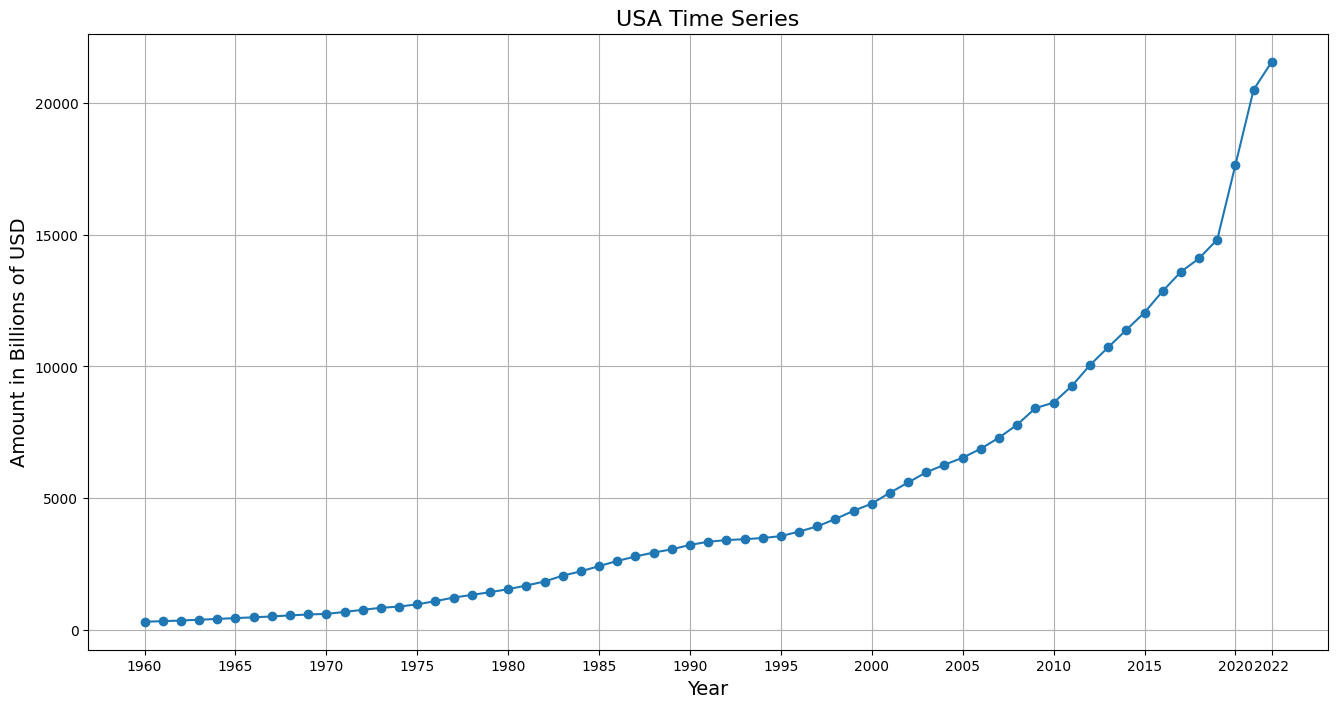

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df_usa.M3 / 1e9, marker='o')
plt.title('USA Time Series', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Amount in Billions of USD', size=14)
ticks = list(df_usa.index[::5]) + [df_usa.index[-1]]
plt.xticks(ticks=ticks, labels=[tick.year for tick in ticks])
plt.grid(True)
plt.show()

**Conclusion**: Based on the time series plot, it's clear that the M3 series for the USA is not stationary due to the upward trend - especially in recent years.

## **02.02 Stationarity Testing using ACF, PACF, and ADF Tests**

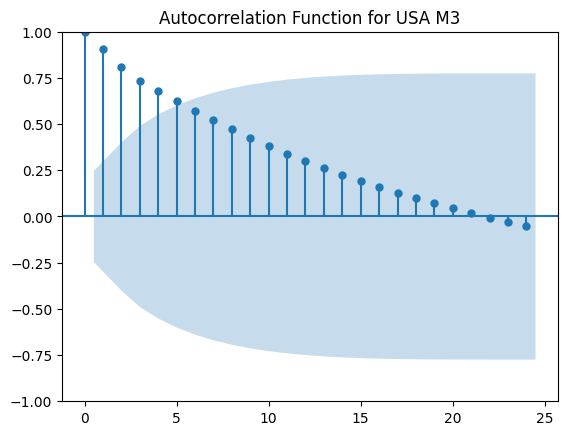

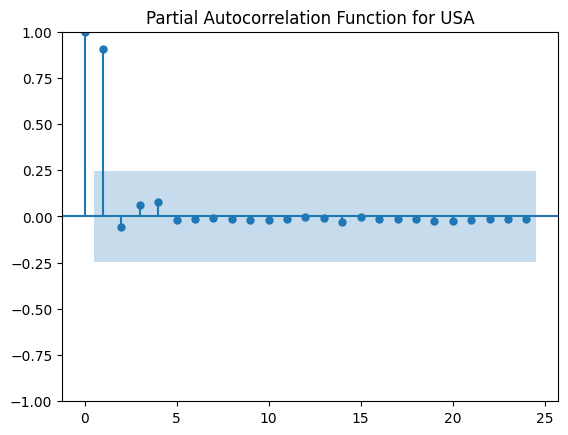

ADF Statistic: 0.962939
p-value: 0.993859
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598
The time series is not stationary.


In [ ]:
# Plotting the Autocorrelation (ACF)
plot_acf(df_usa.M3, lags=24, title='Autocorrelation Function for USA M3')
plt.show()

# Plotting the Partial Autocorrelation (PACF)
plot_pacf(df_usa.M3, lags=24, title='Partial Autocorrelation Function for USA')
plt.show()

# Augmented Dickey-Fuller Test (ADF)
adf_test = adfuller(df_usa.M3)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

## **02.03. Time Series Differencing**

In [ ]:
df_usa['first_difference'] = df_usa.M3.diff()
df_usa_first_diff = df_usa.dropna()  # removing the first row since it has 'na' value
df_usa_first_diff.head()

,M3,first_difference
date,,
1961-01-01,3.248170e+11,2.050900e+10
1962-01-01,3.500750e+11,2.525800e+10
1963-01-01,3.795750e+11,2.950000e+10
1964-01-01,4.093500e+11,2.977500e+10
1965-01-01,4.425080e+11,3.315800e+10


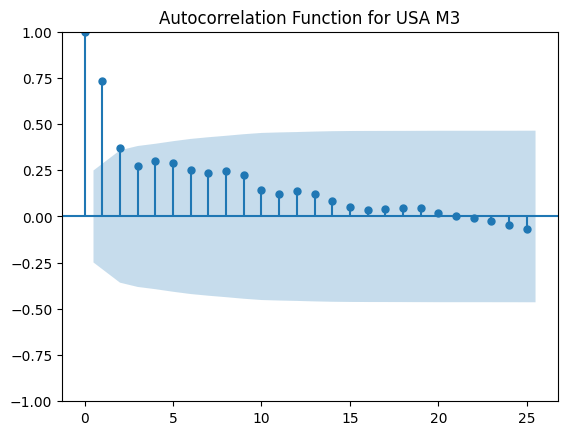

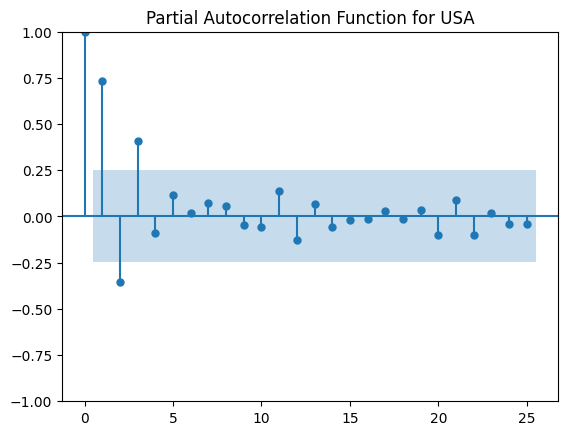

ADF Statistic: -4.014183
p-value: 0.008394
Critical Values:
	1%: -4.115
	5%: -3.485
	10%: -3.171
The time series is stationary.


In [ ]:
# Plotting the Autocorrelation (ACF)
plot_acf(df_usa_first_diff.first_difference, lags=25, title='Autocorrelation Function for USA M3')
plt.show()

# Plotting the Partial Autocorrelation (PACF)
plot_pacf(df_usa_first_diff.first_difference, lags=25, title='Partial Autocorrelation Function for USA')
plt.show()

# Augmented Dickey-Fuller Test (ADF)
adf_test = adfuller(df_usa_first_diff.first_difference, regression='ct', maxlag = 0)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

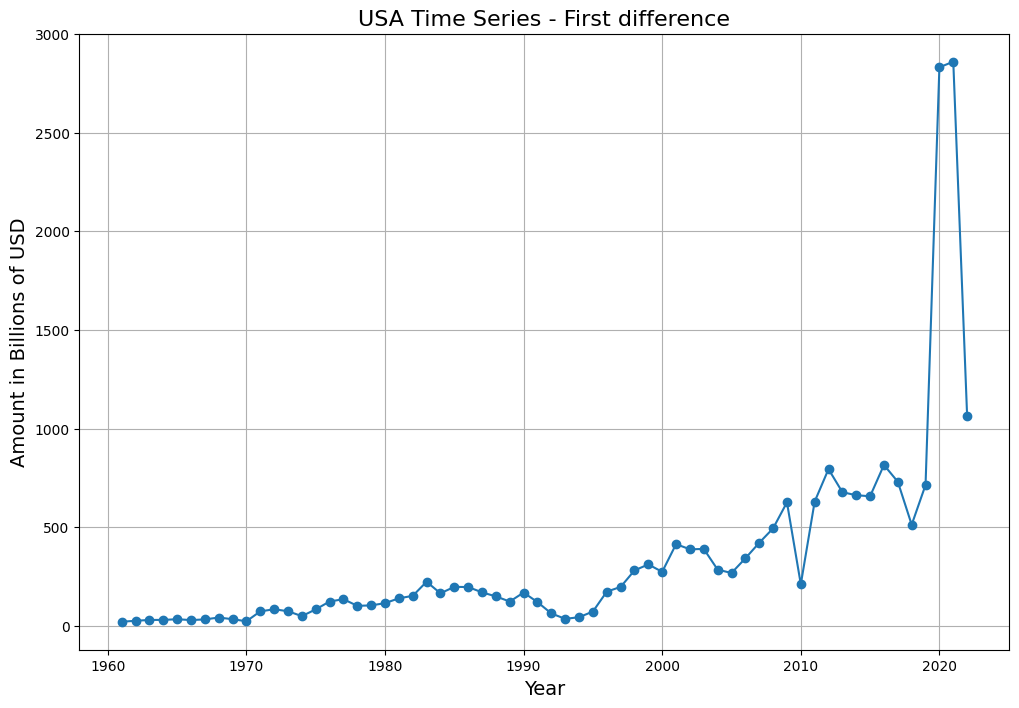

In [ ]:
# Plotting the first difference of the M3 time series for USA
plt.figure(figsize=(12, 8))
plt.plot(df_usa_first_diff.first_difference / 1e9, marker='o')
plt.title('USA Time Series - First difference', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Amount in Billions of USD', size=14)
plt.grid(True)
plt.show()

## **02.04. Defining the ARIMA Model**

In [ ]:
# Fit ARIMA(3, 1, 0) model for USA
model_310 = ARIMA(df_usa['first_difference'].dropna(), order=(3, 1, 0), freq='AS-JAN')
model_fit_310 = model_310.fit()

# Summary of ARIMA(3, 1, 0)
model_summary_310 = model_fit_310.summary()
print(model_summary_310)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   62
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -1693.055
Date:                Sat, 07 Sep 2024   AIC                           3394.110
Time:                        12:30:13   BIC                           3402.554
Sample:                    01-01-1961   HQIC                          3397.419
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0592      0.279      0.212      0.832      -0.487       0.606
ar.L2         -0.8045      0.310     -2.595      0.009      -1.412      -0.197
ar.L3         -0.2024      0.583     -0.347      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
# Fit ARIMA(0, 1, 2) model for USA
model_012 = ARIMA(df_usa['first_difference'].dropna(), order=(0, 1, 2), freq='AS-JAN')
model_fit_012 = model_012.fit()

# Summary of ARIMA(0, 1, 2)
model_summary_012 = model_fit_012.summary()
print(model_summary_012)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   62
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1697.420
Date:                Sat, 07 Sep 2024   AIC                           3400.839
Time:                        12:30:13   BIC                           3407.172
Sample:                    01-01-1961   HQIC                          3403.321
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0835      0.098      0.855      0.392      -0.108       0.275
ma.L2         -0.6954      0.121     -5.757      0.000      -0.932      -0.459
sigma2      1.042e+23        nan        nan        n

In [ ]:
# Fit ARIMA(1, 1, 1) model for USA
model_111 = ARIMA(df_usa['first_difference'].dropna(), order=(1, 1, 1), freq='AS-JAN')
model_fit_111 = model_111.fit()

# Summary of ARIMA(1, 1, 1)
model_summary_111 = model_fit_111.summary()
print(model_summary_111)


                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   62
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1706.114
Date:                Sat, 07 Sep 2024   AIC                           3418.227
Time:                        12:30:13   BIC                           3424.560
Sample:                    01-01-1961   HQIC                          3420.709
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4700      0.082     -5.714      0.000      -0.631      -0.309
ma.L1          0.9066      0.049     18.419      0.000       0.810       1.003
sigma2      1.461e+23   1.61e-25   9.07e+47      0.0

## **02.05. Evaluating our model - ARIMA (3,1,0)**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


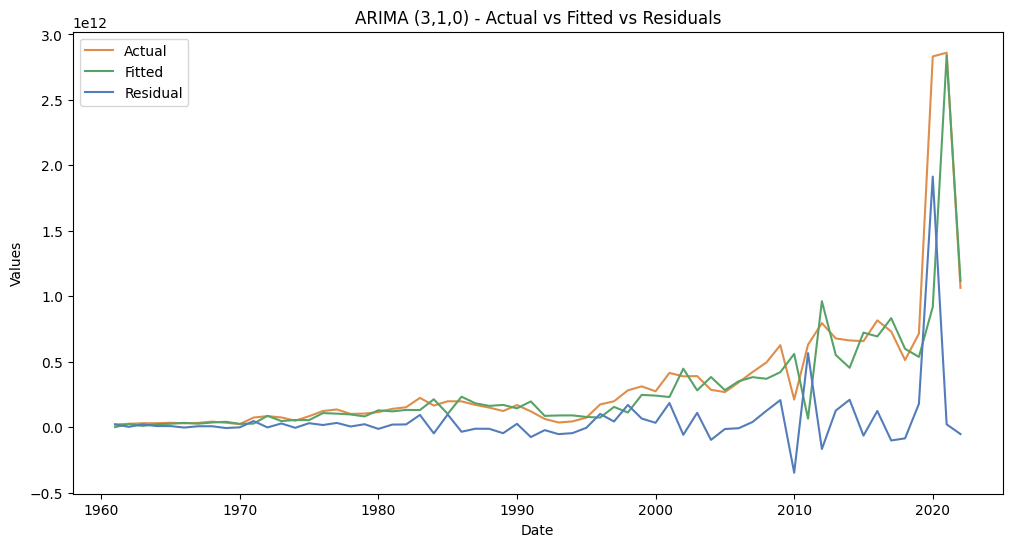

In [ ]:
# Fit ARIMA(3, 1, 0) model for USA
model_310 = ARIMA(df_usa['first_difference'].dropna(), order=(3, 1, 0), freq='AS-JAN')
model_fit_310 = model_310.fit()

# Forecasting and residuals calculation
df_usa['predicted'] = model_fit_310.predict()
df_usa['residual'] = df_usa['first_difference'] - df_usa['predicted']

# Plotting the actual vs fitted vs residuals
plt.figure(figsize=(12, 6))
plt.plot(df_usa.index, df_usa['first_difference'], label='Actual', color='#df8d4b')
plt.plot(df_usa.index, df_usa['predicted'], label='Fitted', color='#57a367')
plt.plot(df_usa.index, df_usa['residual'], label='Residual', color='#537cbb')

plt.title('ARIMA (3,1,0) - Actual vs Fitted vs Residuals')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

## **02.06. ARCH test**

In [ ]:
arch_test = het_arch(df_usa['residual'].dropna(), nlags=8)

print('ARCH Test Statistic:', arch_test[0])
print('ARCH Test p-value: {:.10f}'.format(arch_test[1]))

ARCH Test Statistic: 0.041302922582532764
ARCH Test p-value: 0.9999999925


## **02.07. Forecast and final results**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


               Predicted      Lower CI      Upper CI
2023-01-01  2.244940e+13  2.193571e+13  2.296309e+13
2024-01-01  2.475236e+13  2.356155e+13  2.594318e+13
2025-01-01  2.733576e+13  2.562626e+13  2.904527e+13
2026-01-01  2.879870e+13  2.664882e+13  3.094857e+13
2027-01-01  2.993389e+13  2.719178e+13  3.267600e+13


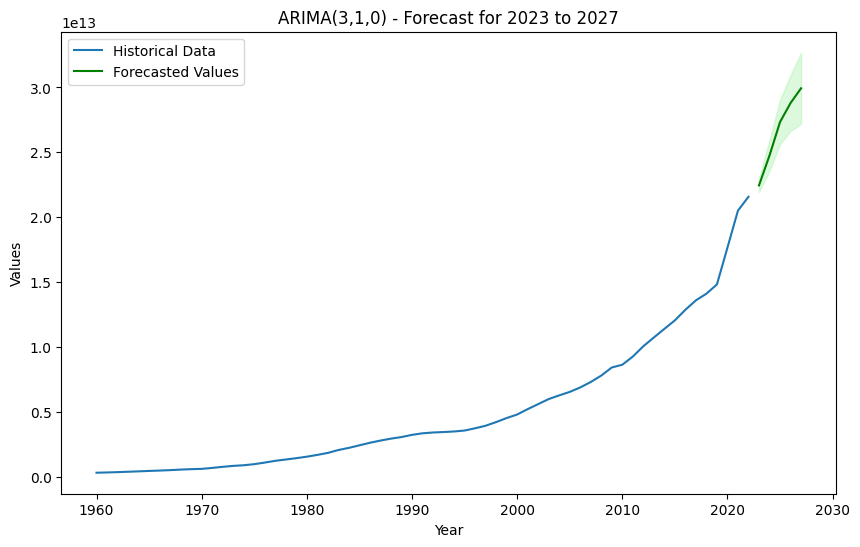

In [ ]:
# Fit ARIMA(3, 1, 0) model for USA
model_310 = ARIMA(df_usa['M3'], order=(3, 1, 0), freq='AS-JAN')
model_fit_310 = model_310.fit()

# Forecast the next 5 years
forecast_years = 5
forecast = model_fit_310.get_forecast(steps=forecast_years)

predicted_values = forecast.predicted_mean.tolist()
confidence_intervals = forecast.conf_int()

lower_ci = confidence_intervals.iloc[:, 0].tolist()
upper_ci = confidence_intervals.iloc[:, 1].tolist()

future_dates = pd.date_range(start='2023-01-01', periods=forecast_years, freq='AS-JAN')

forecast_df = pd.DataFrame({
    'Predicted': predicted_values,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci
}, index=future_dates)

print(forecast_df)

plt.figure(figsize=(10, 6))
plt.plot(df_usa.index, df_usa['M3'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Predicted'], label='Forecasted Values', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='lightgreen', alpha=0.3)

plt.title('ARIMA(3,1,0) - Forecast for 2023 to 2027')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()

**Conclusion:** Based on the graph, which displays both historical and forecasted values of the M3 monetary aggregate for the USA, we observe a continued upward trend in M3 over the forecasted period from 2023 to 2027.

The significant rise in the M3 aggregate during the COVID-19 pandemic contributed to a notable increase in money supply as governments and central banks implemented large-scale economic stimulus measures. This surge in M3 is evident in the sharp rise seen around 2020, followed by a period of uncertainty in the forecast.

The forecasted values indicate a steady growth in M3, but the wide confidence intervals (represented by the shaded area) reflect considerable uncertainty in the trajectory of future growth. The uncertainty is primarily a result of the unprecedented monetary expansion during the pandemic, making it challenging to precisely predict the future movements of the M3 aggregate.

# **03. Japan M3 Time Series Analysis**

In this chapter, we will perform an analysis of the M3 monetary aggregate data for Japan. We will follow the same steps as described in Europe and USA M3 analysis.

## **03.01. Exploratory Data Visualization of Monetary Aggregate M3 for Japan**

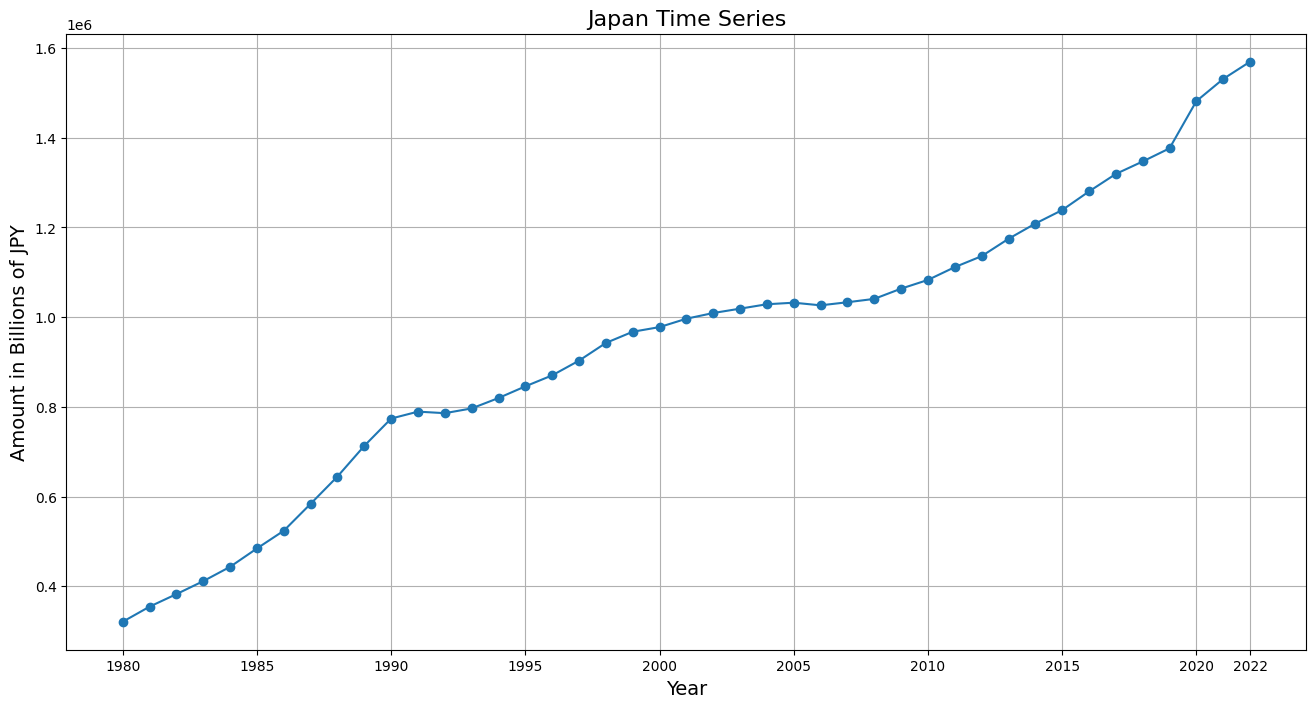

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df_japan.M3 / 1e9, marker='o')
plt.title('Japan Time Series', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Amount in Billions of JPY', size=14)
ticks = list(df_japan.index[::5]) + [df_japan.index[-1]]
plt.xticks(ticks=ticks, labels=[tick.year for tick in ticks])
plt.grid(True)
plt.show()

**Conclusion**: Based on the time series plot, it's clear that the M3 series for Japan is not stationary due to the upward trend - especially in recent years.

## **03.02 Stationarity Testing using ACF, PACF, and ADF Tests**

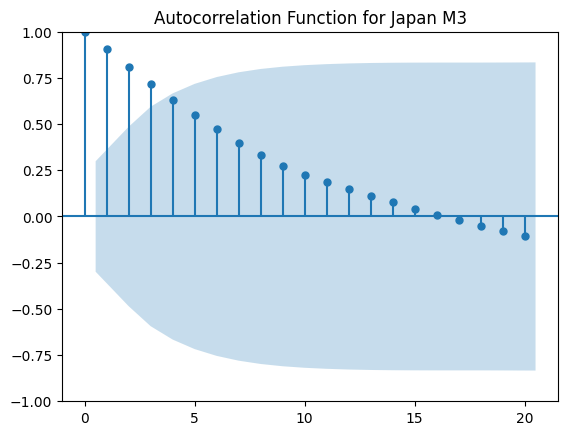

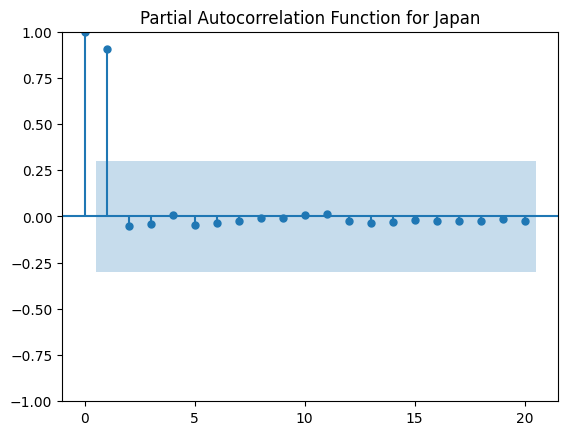

ADF Statistic: 2.110052
p-value: 0.998800
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
The time series is not stationary.


In [ ]:
# Plotting the Autocorrelation (ACF) for Japan
plot_acf(df_japan.M3, lags=20, title='Autocorrelation Function for Japan M3')
plt.show()

# Plotting the Partial Autocorrelation (PACF) for Japan
plot_pacf(df_japan.M3, lags=20, title='Partial Autocorrelation Function for Japan')
plt.show()

# Augmented Dickey-Fuller Test (ADF) for Japan
adf_test = adfuller(df_japan.M3)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

## **03.03. Time Series Differencing**

In [ ]:
df_japan['first_difference'] = df_japan.M3.diff()
df_japan_first_diff = df_japan.dropna()  # removing the first row since it has 'na' value
df_japan_first_diff.head()

,M3,first_difference
date,,
1981-01-01,3.546400e+14,3.368900e+13
1982-01-01,3.825560e+14,2.791600e+13
1983-01-01,4.114410e+14,2.888500e+13
1984-01-01,4.433720e+14,3.193100e+13
1985-01-01,4.843957e+14,4.102375e+13


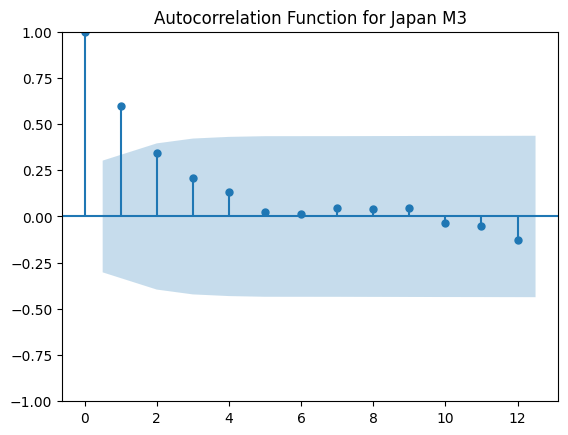

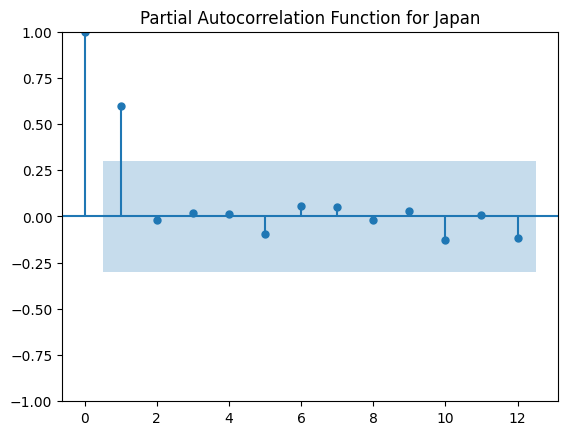

ADF Statistic: -3.120477
p-value: 0.025074
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606
The time series is stationary.


In [ ]:
# Plotting the Autocorrelation (ACF) for Japan M3
plot_acf(df_japan_first_diff.first_difference, lags=12, title='Autocorrelation Function for Japan M3')
plt.show()

# Plotting the Partial Autocorrelation (PACF) for Japan M3
plot_pacf(df_japan_first_diff.first_difference, lags=12, title='Partial Autocorrelation Function for Japan')
plt.show()

# Augmented Dickey-Fuller Test (ADF) for Japan M3
adf_test = adfuller(df_japan_first_diff.first_difference, regression='c')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

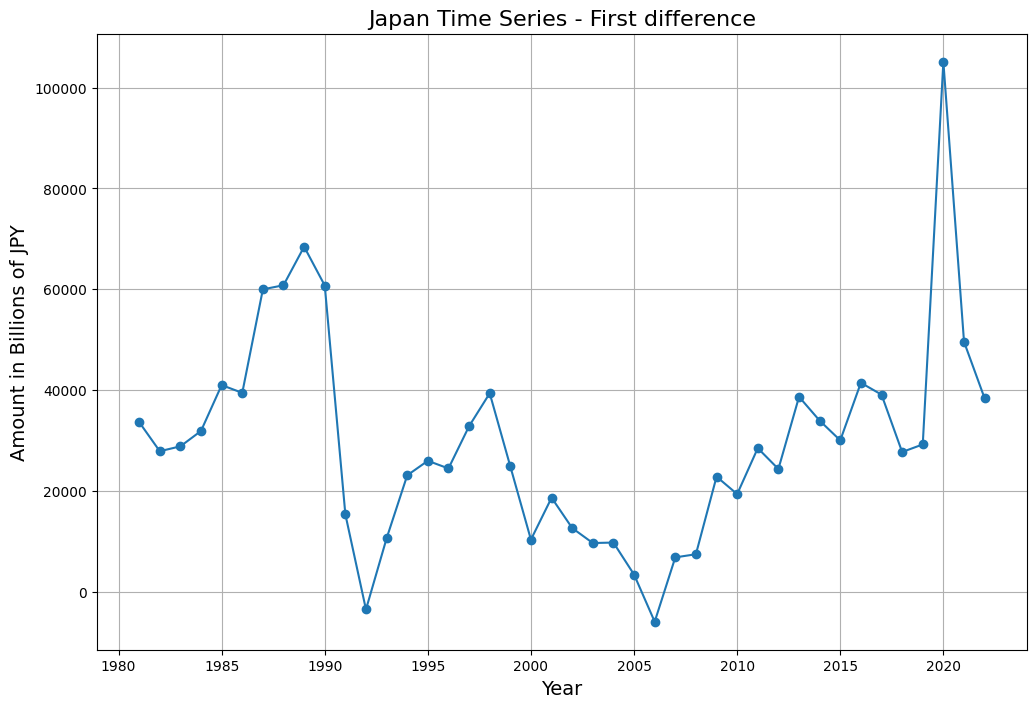

In [ ]:
# Plotting the first difference of the M3 time series for Japan
plt.figure(figsize=(12, 8))
plt.plot(df_japan_first_diff.first_difference / 1e9, marker='o')
plt.title('Japan Time Series - First difference', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Amount in Billions of JPY', size=14)
plt.grid(True)
plt.show()

## **03.04. Defining the ARIMA Model**

In [ ]:
# Fit ARIMA(0, 1, 2) model for Japan
model_012 = ARIMA(df_japan['first_difference'].dropna(), order=(0, 1, 2), freq='AS-JAN')
model_fit_012 = model_012.fit()

# Summary of ARIMA(0, 1, 2)
model_summary_012 = model_fit_012.summary()
print(model_summary_012)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   42
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1308.510
Date:                Sat, 07 Sep 2024   AIC                           2623.021
Time:                        12:40:05   BIC                           2628.161
Sample:                    01-01-1981   HQIC                          2624.892
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3146      0.131     -2.410      0.016      -0.570      -0.059
ma.L2         -0.2394      0.211     -1.136      0.256      -0.652       0.173
sigma2      3.505e+26   3.27e-28   1.07e+54      0.0

In [ ]:
# Fit ARIMA(1, 1, 0) model for Japan
model_110 = ARIMA(df_japan['first_difference'].dropna(), order=(1, 1, 0), freq='AS-JAN')
model_fit_110 = model_110.fit()

# Summary of ARIMA(1, 1, 0)
model_summary_110 = model_fit_110.summary()
print(model_summary_110)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   42
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1310.110
Date:                Sat, 07 Sep 2024   AIC                           2624.220
Time:                        12:40:13   BIC                           2627.647
Sample:                    01-01-1981   HQIC                          2625.468
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1913      0.094     -2.026      0.043      -0.376      -0.006
sigma2      3.411e+26   2.32e-29   1.47e+55      0.000    3.41e+26    3.41e+26
Ljung-Box (L1) (Q):                   0.10   Jarque-

In [ ]:
# Fit ARIMA(1, 1, 1) model for Japan
model_111 = ARIMA(df_japan['first_difference'].dropna(), order=(1, 1, 1), freq='AS-JAN')
model_fit_111 = model_111.fit()

# Summary of ARIMA(1, 1, 1)
model_summary_111 = model_fit_111.summary()
print(model_summary_111)

                               SARIMAX Results                                
Dep. Variable:       first_difference   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1307.988
Date:                Sat, 07 Sep 2024   AIC                           2621.977
Time:                        12:40:22   BIC                           2627.117
Sample:                    01-01-1981   HQIC                          2623.849
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6271      0.177      3.540      0.000       0.280       0.974
ma.L1         -0.9789      0.212     -4.624      0.000      -1.394      -0.564
sigma2      3.408e+26   6.37e-28   5.35e+53      0.0

## **03.05. Evaluating our model - ARIMA (1,1,0)**

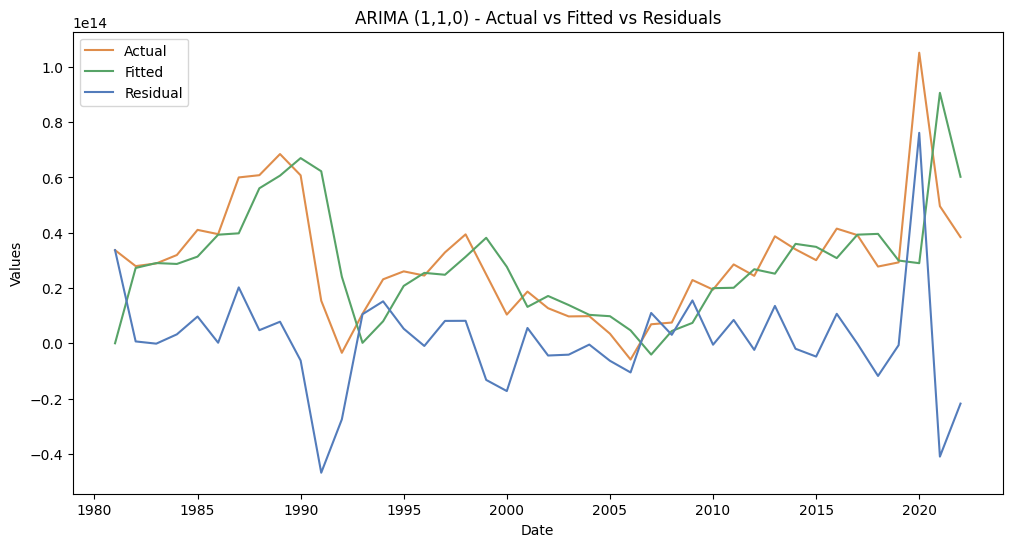

In [ ]:
# Fit ARIMA(1, 1, 0) model for Japan
model_110 = ARIMA(df_japan['first_difference'].dropna(), order=(1, 1, 0), freq='AS-JAN')
model_fit_110 = model_110.fit()

# Forecasting and residuals calculation
df_japan['predicted'] = model_fit_110.predict()
df_japan['residual'] = df_japan['first_difference'] - df_japan['predicted']

# Plotting the actual vs fitted vs residuals
plt.figure(figsize=(12, 6))
plt.plot(df_japan.index, df_japan['first_difference'], label='Actual', color='#df8d4b')
plt.plot(df_japan.index, df_japan['predicted'], label='Fitted', color='#57a367')
plt.plot(df_japan.index, df_japan['residual'], label='Residual', color='#537cbb')

plt.title('ARIMA (1,1,0) - Actual vs Fitted vs Residuals')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

## **03.06. ARCH test**

In [ ]:
arch_test = het_arch(df_japan['residual'].dropna())

print('ARCH Test Statistic:', arch_test[0])
print('ARCH Test p-value: {:.10f}'.format(arch_test[1]))

ARCH Test Statistic: -0.5536231137020509
ARCH Test p-value: 1.0000000000


## **03.07. Forecast and final results**

               Predicted      Lower CI      Upper CI
2023-01-01  1.583399e+15  1.548097e+15  1.618701e+15
2024-01-01  1.588540e+15  1.528779e+15  1.648302e+15
2025-01-01  1.590422e+15  1.510579e+15  1.670265e+15
2026-01-01  1.591111e+15  1.494340e+15  1.687881e+15
2027-01-01  1.591362e+15  1.479900e+15  1.702825e+15


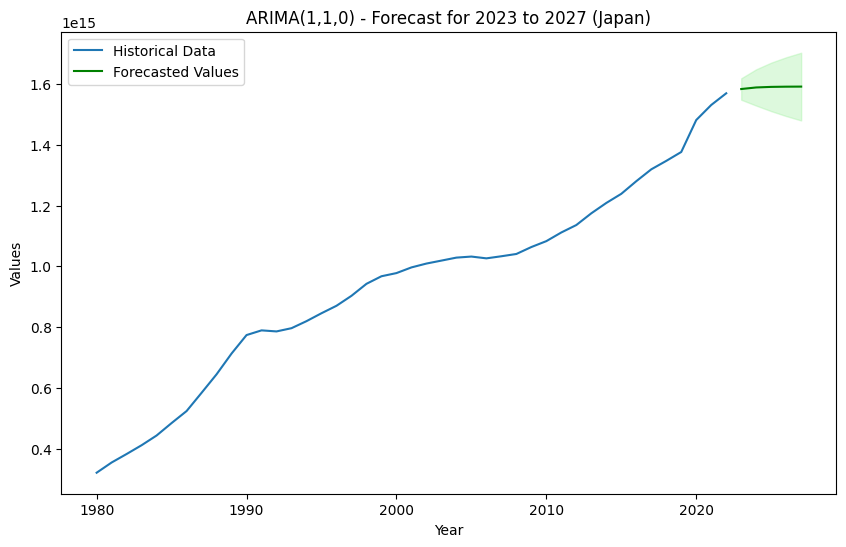

In [ ]:
# Fit ARIMA(1, 1, 0) model for Japan
model_110 = ARIMA(df_japan['M3'], order=(1, 1, 0), freq='AS-JAN')
model_fit_110 = model_110.fit()

# Forecast the next 5 years
forecast_years = 5
forecast = model_fit_110.get_forecast(steps=forecast_years)

predicted_values = forecast.predicted_mean.tolist()
confidence_intervals = forecast.conf_int()

lower_ci = confidence_intervals.iloc[:, 0].tolist()
upper_ci = confidence_intervals.iloc[:, 1].tolist()

future_dates = pd.date_range(start='2023-01-01', periods=forecast_years, freq='AS-JAN')

forecast_df = pd.DataFrame({
    'Predicted': predicted_values,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci
}, index=future_dates)

print(forecast_df)

plt.figure(figsize=(10, 6))
plt.plot(df_japan.index, df_japan['M3'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Predicted'], label='Forecasted Values', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='lightgreen', alpha=0.3)

plt.title('ARIMA(1,1,0) - Forecast for 2023 to 2027 (Japan)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()

**Conclusion:** Based on the graph, which displays both historical and forecasted values of the M3 monetary aggregate for Japan, we observe a continued upward trend in M3 over the forecasted period from 2023 to 2027.

Similar to other global economies, Japan experienced an increase in the M3 aggregate, though the rise is less pronounced compared to regions like the USA. This can be attributed to Japan's long-standing monetary policies and controlled economic interventions. The growth in M3 is evident from the early 1980s, reflecting the steady expansion of Japan's money supply.

The forecasted values show a relatively steady growth pattern, but the confidence intervals (represented by the shaded area) suggest some degree of uncertainty. This uncertainty may be influenced by external economic factors, including the impact of global financial conditions and Japan’s response to potential economic shocks. While the growth appears stable, the potential for variation highlights the challenge of accurately predicting future movements in M3, especially in the context of global economic volatility.